<a href="https://colab.research.google.com/github/amaskey/soccerimpact/blob/main/SoccerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import keras.api._v2.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, InputLayer
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
!pip install -q git+https://github.com/rdk2132/scikeras # workaround for scikeras deprecation
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore")

def categorical_to_numpy(labels_in):
  labels = []
  for label in labels_in:
    if label == 'dog':
      labels.append(np.array([1, 0]))
    else:
      labels.append(np.array([0, 1]))
  return np.array(labels)

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    if hasattr(history, 'history_'):
      history = history.history_
    else:
      history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d','', sms)
    sms = re.sub('_\d\d','', sms)
    sms = re.sub('_\d','', sms)
    return sms


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Get pip package
import urllib.request
import os

# Download get-pip.py script
#url = 'https://bootstrap.pypa.io/get-pip.py' #get-pip py script from url
#filename = 'get-pip.py'
#urllib.request.urlretrieve(url, filename) #

# Install pip
#os.system('python get-pip.py')
#import subprocess
# Use pip to install SoccerNet package
#subprocess.call(['pip', 'install', 'SoccerNet'])
display.max_seq_items = None
from google.colab import drive
drive.mount('/content/gdrive')
import os
from os import listdir
train_folder_path = '/content/gdrive/MyDrive/path/to/SoccerNet/Ball.v3i.multiclass/train/'
test_folder_path = '/content/gdrive/MyDrive/path/to/SoccerNet/Ball.v3i.multiclass/test/'


Mounted at /content/gdrive


Found 399 files belonging to 3 classes.
Using 320 files for training.
Using 79 files for validation.
['dribble', 'none', 'pass']
(32, 256, 256, 3)
(32,)


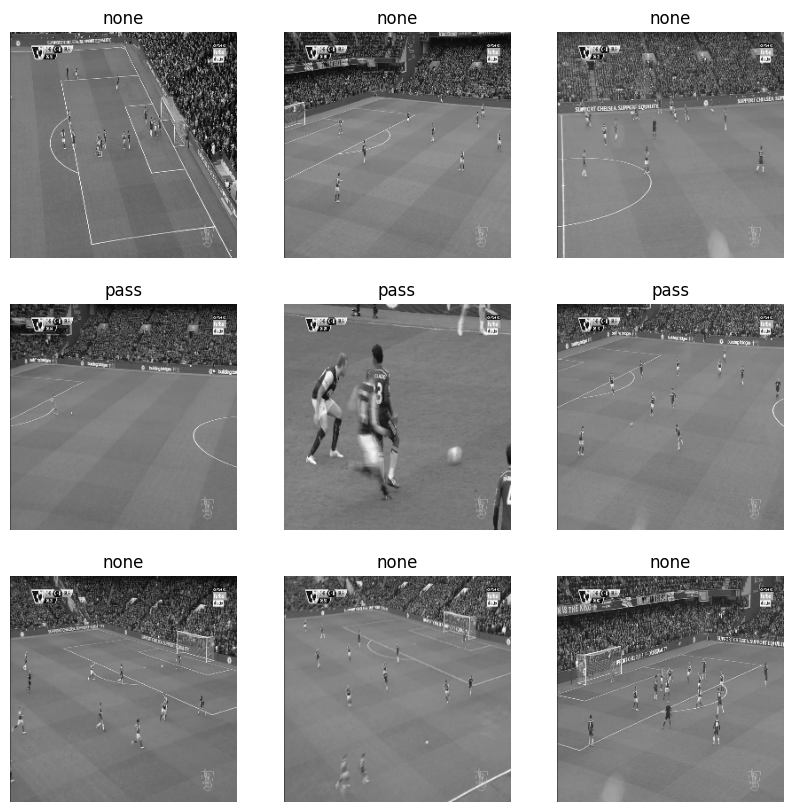

In [ ]:
import pandas as pd
y_train = pd.read_csv(train_folder_path+"_classes.csv")
y_test = pd.read_csv(test_folder_path+"_classes.csv")

inputs_train = []
inputs_test = []
labels_train = []
labels_test = []
from PIL import Image
from numpy import asarray
image_list = []


train_ds, val_ds = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/path/to/SoccerNet/Ball.v3i.multiclass/train/classes',seed=123,validation_split=0.2,subset="both")

class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


Epoch 1/20
10/10 [==============================] - 21s 962ms/step - loss: 1.6017 - accuracy: 0.4812 - val_loss: 1.0361 - val_accuracy: 0.4937
Epoch 2/20
10/10 [==============================] - 1s 49ms/step - loss: 0.9991 - accuracy: 0.5781 - val_loss: 1.1585 - val_accuracy: 0.4937
Epoch 3/20
10/10 [==============================] - 1s 48ms/step - loss: 0.9712 - accuracy: 0.5781 - val_loss: 1.0298 - val_accuracy: 0.4937
Epoch 4/20
10/10 [==============================] - 1s 47ms/step - loss: 0.8864 - accuracy: 0.5813 - val_loss: 0.9522 - val_accuracy: 0.4684
Epoch 5/20
10/10 [==============================] - 1s 47ms/step - loss: 0.7938 - accuracy: 0.6281 - val_loss: 0.9367 - val_accuracy: 0.4937
Epoch 6/20
10/10 [==============================] - 1s 48ms/step - loss: 0.7377 - accuracy: 0.6406 - val_loss: 0.9474 - val_accuracy: 0.5190
Epoch 7/20
10/10 [==============================] - 1s 47ms/step - loss: 0.6329 - accuracy: 0.7375 - val_loss: 1.1531 - val_accuracy: 0.4557
Epoch 8/20


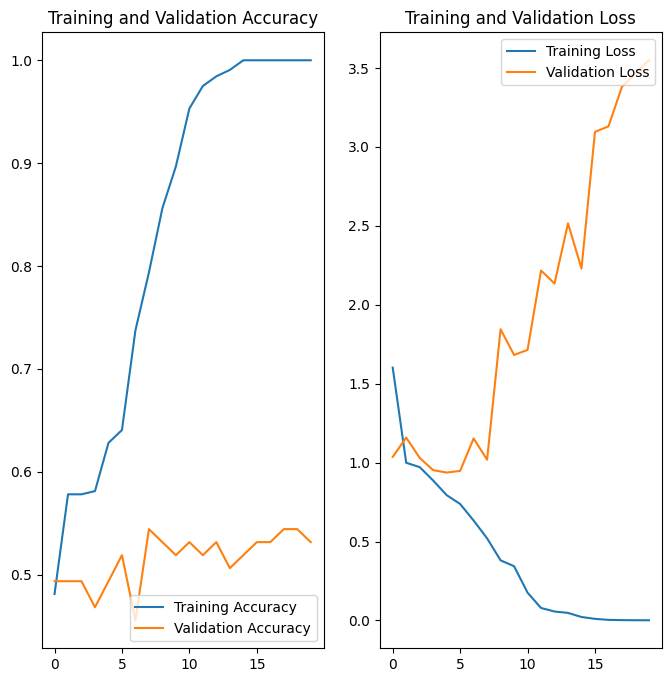

Found 100 files belonging to 3 classes.
============== Test performance =================
4/4 [==============================] - 9s 64ms/step - loss: 1.9016 - accuracy: 0.5800
test loss, test acc: [1.9016433954238892, 0.5799999833106995]
Image # 1
Label is none
1/1 [==============================] - 0s 193ms/step
Predicted class is none
Image # 2
Label is none
1/1 [==============================] - 0s 18ms/step
Predicted class is pass
Image # 3
Label is none
1/1 [==============================] - 0s 18ms/step
Predicted class is none
Image # 4
Label is none
1/1 [==============================] - 0s 18ms/step
Predicted class is none
Image # 5
Label is none
1/1 [==============================] - 0s 19ms/step
Predicted class is none
Image # 6
Label is none
1/1 [==============================] - 0s 20ms/step
Predicted class is none
Image # 7
Label is none
1/1 [==============================] - 0s 20ms/step
Predicted class is pass
Image # 8
Label is dribble
1/1 [=============================

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical



def plot_cm(name, cm):
  classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

  df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
  df_cm = df_cm.round(5)

  plt.figure(figsize = (12, 8))
  sns.heatmap(df_cm,  annot=True, fmt='g')
  plt.title(name + " Model Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()



#model = Sequential()

# Add convolutional and pooling layers
#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
# Flatten the output from 2D to 1D
#model.add(Flatten())

# Add fully connected layers
#model.add(Dense(64, activation='softmax'))

from tensorflow.keras import layers

model = Sequential([
#  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile the model
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#model.summary()

epochs=20
# Train the model
history =  model.fit(train_ds,validation_data=val_ds, batch_size = 8, epochs=epochs)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#        Test the Model

test_dataset = tf.keras.utils.image_dataset_from_directory("/content/gdrive/MyDrive/path/to/SoccerNet/Ball.v3i.multiclass/test/classes",shuffle=True)

print("============== Test performance =================")

results = model.evaluate(test_dataset)

print("===============================")
print("test loss, test acc:", results)

print("===============================")

imageIndex = 0;
for image_batch, labels_batch in test_dataset:
  for i in range(image_batch.shape[0]):
    imageIndex = imageIndex + 1
    img = image_batch[i]
    print("Image # "+str(imageIndex))
    print("Label is "+class_names[labels_batch[i]])
    img = (np.expand_dims(img,0))
    predictions_single = model.predict(img)

    #get the index of the highest probability prediction
    #get the corresponding class name
    print( "Predicted class is "+ class_names[predictions_single[0].argmax()] )



#for images, labels in test_dataset.map(lambda x, y: (x, y)):
#  prediction = model.predict(images)
#  print("=============   Predictions   ===============")
#  print(images.shape)
#  prediction
#  prediction[0]
  #for label in labels:
  #  print(class_names[label])

#for images, labels in test_dataset.take(1):
  #plt.imshow(images[i].numpy().astype("uint8"))
  #prediction = model.predict(images[i])
  #print("Class label  "+class_names[labels[i]])
  #print("prediction shape:", prediction.shape)
  #prediction[0]
  #print("===============================")


#predictions = tf.where(predictions < 0.5,0, 1)



#           batch_size=BATCH_SIZE,
#           image_size=IMG_SIZE)

#for i in range(y_test.shape[0]):
#    filename =test_folder_path+y_test['filename'][i]
#    a = y_test.columns[(y_test == 1).iloc[i]]

    #file_path = tf.keras.utils.get_file(a[0].strip(), origin=filename)

    #img_height = 256
    #img_width = 256
    #newsize = (img_height, img_width)
    #img = tf.keras.utils.load_img(file_path, target_size=(img_height,img_width))
    #img_array = tf.keras.utils.img_to_array(Image.open(filename).resize(newsize))
#    img_array = tf.expand_dims(img_array, 0) # Create a batch

    #predictions = model.predict(img_array)


#    score = tf.nn.softmax(predictions[0])
#    print("Real class for the image is "+a[0].strip()+"  ")
#    print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))


